In [126]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import missingno as msno
from sklearn.preprocessing import LabelEncoder

In [127]:
netflix_df = pd.read_csv("netflix_titles.csv")
df = netflix_df.copy()
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [128]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## Data Preprocessing

### handling missing values
is there any relationship between missing values?

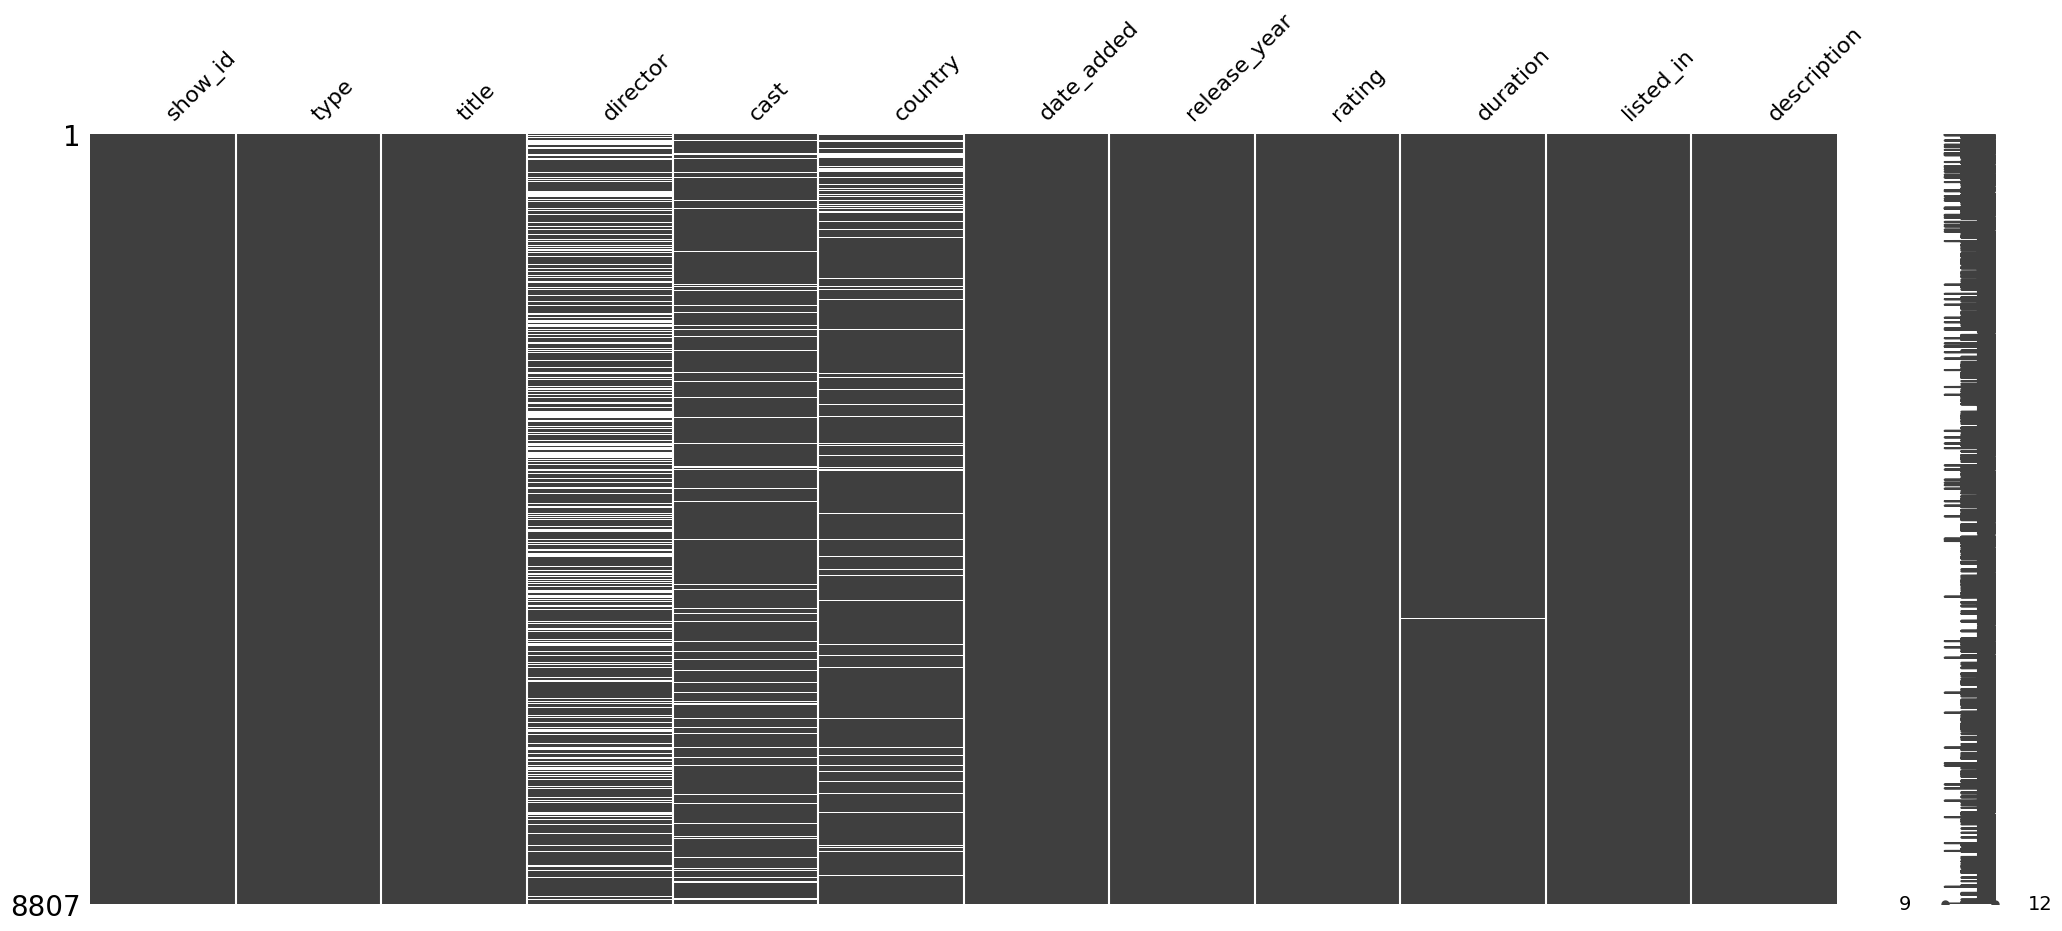

In [129]:
msno.matrix(df);

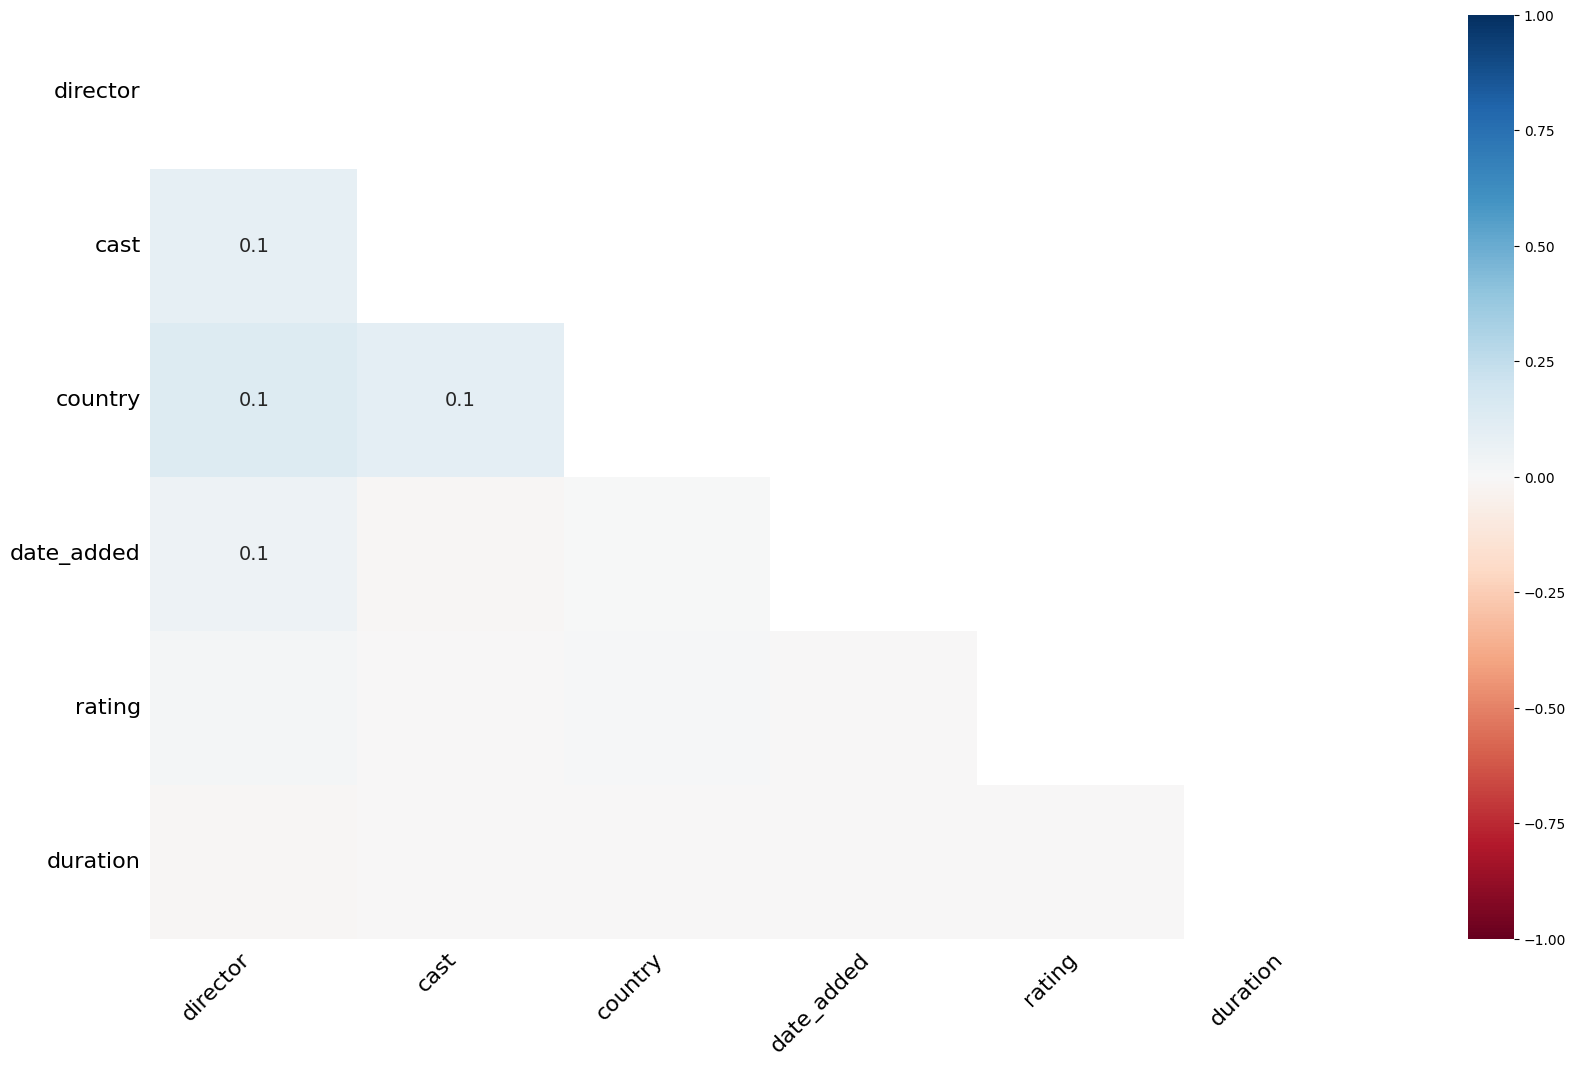

In [130]:
msno.heatmap(df);
# this function gives us nullity correlation between variables. 
# as we see there is no tight nullity correlation between variables, so we can drop or fill the columns.

In [131]:
df.drop("director", axis=1, inplace=True) # we dont use this column
df.drop("cast", axis=1, inplace=True) # we dont use this column

In [132]:
df.drop("description", axis=1, inplace = True)

In [133]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [134]:
# fulfilling categorical missing values with mode.
df["country"].fillna(df["country"].mode()[0], inplace = True)

In [135]:
df["duration"].fillna(df["duration"].mode()[0], inplace = True)

In [136]:
df["rating"].fillna(df["rating"].mode()[0], inplace = True)

In [137]:
df["date_added"].fillna(df["date_added"].mode()[0], inplace = True)
df.isnull().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

## Standardization

In [138]:
lbe = LabelEncoder()
df["movie_type"]=lbe.fit_transform(df["type"])
# if movie--> 0  else --> 1
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,movie_type
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,0
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",1
2,s3,TV Show,Ganglands,United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",1
3,s4,TV Show,Jailbirds New Orleans,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV",1
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",1


In [139]:
df["listed_in"].value_counts()

listed_in
Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: count, Length: 514, dtype: int64

In [140]:
empty_list = []
for i in df["duration"]:
    if i.split(" ")[1] == "min":
        empty_list.append(int(i.split(" ")[0]))
    else:
        empty_list.append(0)
numpy_ndarray = np.array(empty_list)

In [141]:
# for comparing total movies time per year and extracting informations about that year.
#this colon is just for movies
df["movie_time_int"] = pd.Series(numpy_ndarray)
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,movie_type,movie_time_int
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,0,90
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",1,0
2,s3,TV Show,Ganglands,United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",1,0
3,s4,TV Show,Jailbirds New Orleans,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV",1,0
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",1,0


In [142]:
movies = df[df["movie_time_int"]!=0]
duration = movies["movie_time_int"]
release_year = movies["release_year"]
dff_x = pd.DataFrame({
    "movies_time":duration,
    "release_year":release_year
})
dff_x.index = dff_x["release_year"].astype("int64")
dff_x.drop("release_year", axis=1, inplace = True)
dff_x.groupby(dff_x.index).sum()

,movies_time
release_year,
1942,70
1943,188
1944,156
1945,154
1946,58
...,...
2017,73180
2018,73774
2019,59164


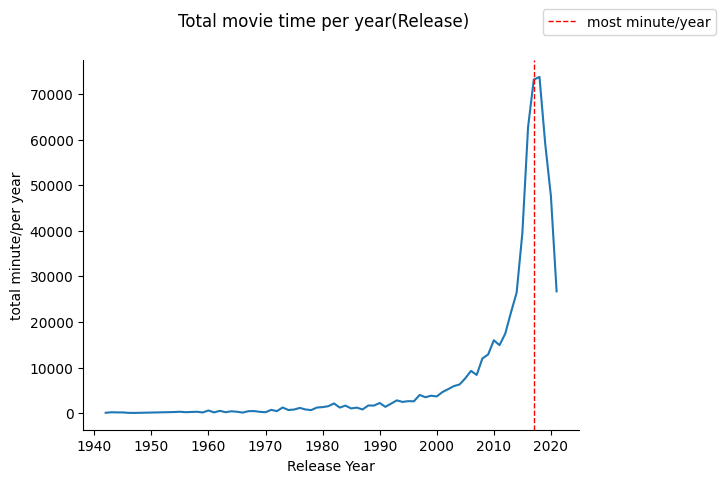

In [143]:
# which year netflix has the most movies in the platform and why? 
fig, ax = plt.subplots()

ax.plot(dff_x.groupby(dff_x.index).sum().index, dff_x.groupby(dff_x.index).sum()["movies_time"])
fig.suptitle("Total movie time per year(Release)")
ax.set_xlabel("Release Year")
ax.set_ylabel("total minute/per year")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.axvline(x=2017, c="r", ls="--", lw=1, label= "most minute/year")
fig.legend(bbox_to_anchor=(1.125,1));

## Data tells the truth
What happened to Netflix in 2017?
Throughout the 2017 fiscal year, Netflix continued to add subscribers, though it never hit the growth seen in the last quarter of the 2016 fiscal year. The streaming site added 5 million subscribers for the first quarter, 5.2 million in the second quarter, and 5.3 million in the third quarter.

In [144]:
# USA watches what kind of things?
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,movie_type,movie_time_int
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,0,90
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",1,0
2,s3,TV Show,Ganglands,United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",1,0
3,s4,TV Show,Jailbirds New Orleans,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV",1,0
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",1,0


In [145]:
usa = df[df["country"]=="United States"]
usa.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,movie_type,movie_time_int
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,0,90
2,s3,TV Show,Ganglands,United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",1,0
3,s4,TV Show,Jailbirds New Orleans,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV",1,0
5,s6,TV Show,Midnight Mass,United States,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",1,0
6,s7,Movie,My Little Pony: A New Generation,United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,0,91


In [146]:
usa_watch_type = pd.DataFrame(usa.type.value_counts())
usa_watch_type.index

Index(['Movie', 'TV Show'], dtype='object', name='type')

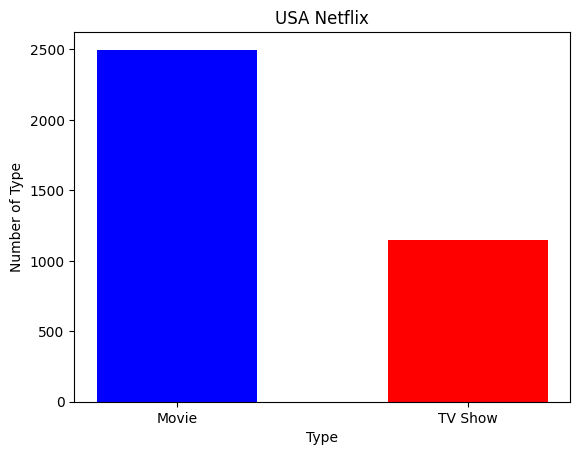

In [147]:
fig, ax = plt.subplots()

ax.bar(usa_watch_type.index, usa_watch_type["count"], width=0.55, color=["blue", "red"])
ax.set_title("USA Netflix")
ax.set_xlabel("Type")
ax.set_ylabel("Number of Type");

In [148]:
# well, in the USA, TOP 5 kind of movies or Tv series people watch most?
usa.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,movie_type,movie_time_int
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,0,90
2,s3,TV Show,Ganglands,United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",1,0
3,s4,TV Show,Jailbirds New Orleans,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV",1,0
5,s6,TV Show,Midnight Mass,United States,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",1,0
6,s7,Movie,My Little Pony: A New Generation,United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,0,91


In [149]:
usa_listed_in_df = pd.DataFrame(usa.groupby("listed_in").count().show_id)
usa_listed_in_df["kind"] = usa_listed_in_df.index
usa_listed_in_df.index = usa_listed_in_df["show_id"]
usa_listed_in_df.drop("show_id", axis=1, inplace = True)
top_five = usa_listed_in_df.sort_index().tail(5)

In [150]:
top_five

,kind
show_id,
110,"Children & Family Movies, Comedies"
121,Kids' TV
150,Children & Family Movies
240,Stand-Up Comedy
265,Documentaries


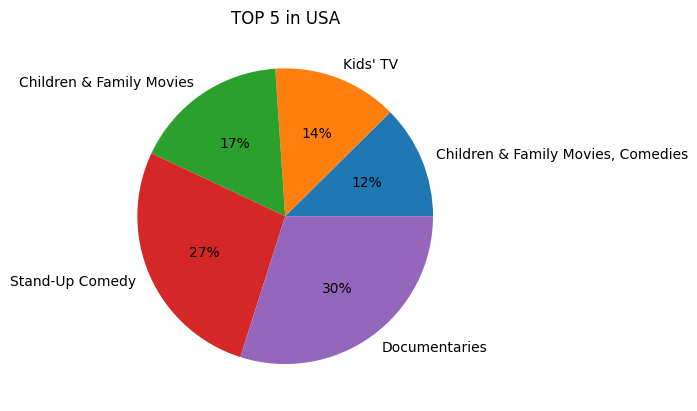

In [151]:
fig, ax = plt.subplots()

labels=top_five["kind"]
ax.set_title("TOP 5 in USA")
ax.pie(top_five.index, labels = labels, autopct="%.0f%%");

In [152]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,movie_type,movie_time_int
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,0,90
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",1,0
2,s3,TV Show,Ganglands,United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",1,0
3,s4,TV Show,Jailbirds New Orleans,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV",1,0
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",1,0


In [153]:
# in earth, movie or TV show? 

In [157]:
TV_show=df.movie_type.sum()#  tv shows which represented by 1.
total = df.count()["type"]
movie = total - TV_show 

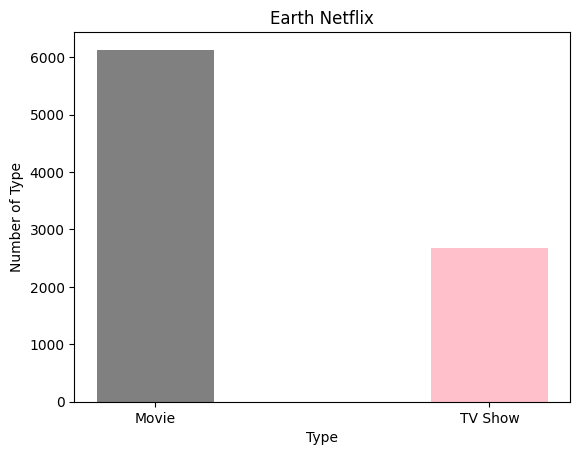

In [158]:
fig, ax = plt.subplots()

ax.bar(["Movie", "TV Show"], [movie, TV_show], width=0.35, color=["gray", "pink"])
ax.set_title("Earth Netflix")
ax.set_xlabel("Type")
ax.set_ylabel("Number of Type");